In [1]:
import tensorflow as tf
tf.test.is_built_with_cuda()

True

In [7]:
#Feature selection: removing images that won't be used in final model
import shutil

shutil.rmtree('c:/users/Rishi/Desktop/Plant_Disease/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Blueberry___healthy')
shutil.rmtree('c:/users/Rishi/Desktop/Plant_Disease/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Orange___Haunglongbing_(Citrus_greening)')
shutil.rmtree('c:/users/Rishi/Desktop/Plant_Disease/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Raspberry___healthy')
shutil.rmtree('c:/users/Rishi/Desktop/Plant_Disease/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Soybean___healthy')
shutil.rmtree('c:/users/Rishi/Desktop/Plant_Disease/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Squash___Powdery_mildew')

shutil.rmtree('c:/users/Rishi/Desktop/Plant_Disease/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Blueberry___healthy')
shutil.rmtree('c:/users/Rishi/Desktop/Plant_Disease/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Orange___Haunglongbing_(Citrus_greening)')
shutil.rmtree('c:/users/Rishi/Desktop/Plant_Disease/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Raspberry___healthy')
shutil.rmtree('c:/users/Rishi/Desktop/Plant_Disease/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Soybean___healthy')
shutil.rmtree('c:/users/Rishi/Desktop/Plant_Disease/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Squash___Powdery_mildew')

In [2]:
#Checking class names and reading in directory for images
import numpy as np
import pathlib
data_dir = pathlib.Path("c:/users/Rishi/Desktop/Plant_Disease/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['Apple___Apple_scab' 'Apple___Black_rot' 'Apple___Cedar_apple_rust'
 'Apple___healthy' 'Cherry_(including_sour)___Powdery_mildew'
 'Cherry_(including_sour)___healthy'
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot'
 'Corn_(maize)___Common_rust_' 'Corn_(maize)___Northern_Leaf_Blight'
 'Corn_(maize)___healthy' 'Grape___Black_rot'
 'Grape___Esca_(Black_Measles)'
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)' 'Grape___healthy'
 'Peach___Bacterial_spot' 'Peach___healthy'
 'Pepper,_bell___Bacterial_spot' 'Pepper,_bell___healthy'
 'Potato___Early_blight' 'Potato___Late_blight' 'Potato___healthy'
 'Strawberry___Leaf_scorch' 'Strawberry___healthy'
 'Tomato___Bacterial_spot' 'Tomato___Early_blight' 'Tomato___Late_blight'
 'Tomato___Leaf_Mold' 'Tomato___Septoria_leaf_spot'
 'Tomato___Spider_mites Two-spotted_spider_mite' 'Tomato___Target_Spot'
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus' 'Tomato___Tomato_mosaic_virus'
 'Tomato___healthy']


In [3]:
#Seeing number of classes
import os
len(os.listdir('c:/users/Rishi/Desktop/Plant_Disease/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/'))

33

In [4]:
#Loading in train and test directories
train_dir = "c:/users/Rishi/Desktop/Plant_Disease/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/"
test_dir = "c:/users/Rishi/Desktop/Plant_Disease/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/"

In [5]:
#Checking number of classes in each directory
print(len(os.listdir('c:/users/Rishi/Desktop/Plant_Disease/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/')))
print(len(os.listdir('c:/users/Rishi/Desktop/Plant_Disease/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/')))

33
33


In [6]:
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from skimage.feature import hog as ext
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
import seaborn as sns
import pandas as pd
import cv2


data_train_dir = pathlib.Path("c:/users/Rishi/Desktop/Plant_Disease/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train")

#Resizing images for quicker train times and creating train set for KNN model
data_train = []
for item in data_train_dir.glob('*'):
  for entry in item.glob('*'):
    img = np.array(mpimg.imread(entry))
    resized_img = cv2.resize(img, (64, 32))
    fd = ext(resized_img)
    data_train.append(fd)

data_test_dir = pathlib.Path("c:/users/Rishi/Desktop/Plant_Disease/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid")

#Resizing images for quicker train times and creating test set for KNN model
data_test = []
for item in data_test_dir.glob('*'):
  for entry in item.glob('*'):
    img = np.array(mpimg.imread(entry))
    resized_img = cv2.resize(img, (64, 32))
    fd = ext(resized_img)
    data_test.append(fd)

ModuleNotFoundError: No module named 'cv2'

In [36]:
#Getting all train labels
train_labels = []
for i in range(len(data_train)):
  if i <= 2016:
    train_labels.append('Apple___Apple_scab')
  elif i > 2016 and i <= 4003:
    train_labels.append('Apple___Black_rot')
  elif i > 4003 and i <= 5763:
    train_labels.append('Apple___Cedar_apple_rust')
  elif i > 5763 and i <= 7771:
    train_labels.append('Apple___healthy')
  elif i > 7771 and i <= 9597:
    train_labels.append('Cherry_(including_sour)___Powdery_mildew')
  elif i > 9597 and i <= 11280:
    train_labels.append('Cherry_(including_sour)___healthy')
  elif i > 11280 and i <= 12922:
    train_labels.append('Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot')
  elif i > 12922 and i <= 14829:
    train_labels.append('Corn_(maize)___Common_rust_')
  elif i > 14829 and i <= 16688:
    train_labels.append('Corn_(maize)___Northern_Leaf_Blight')
  elif i > 16688 and i <= 18596:
    train_labels.append('Corn_(maize)___healthy')
  elif i > 18596 and i <= 20484:
    train_labels.append('Grape___Black_rot')
  elif i > 20484 and i <= 22404:
    train_labels.append('Grape___Esca_(Black_Measles)')
  elif i > 22404 and i <= 24096:
    train_labels.append('Grape___Leaf_blight_(Isariopsis_Leaf_Spot)')
  elif i > 24096 and i <= 25818:
    train_labels.append('Grape___healthy')
  elif i > 25818 and i <= 27656:
    train_labels.append('Peach___Bacterial_spot')
  elif i > 27656 and i <= 29384:
    train_labels.append('Peach___healthy')
  elif i > 29384 and i <= 31297:
    train_labels.append('Pepper,_bell___Bacterial_spot')
  elif i > 31297 and i <= 33285:
    train_labels.append('Pepper,_bell___healthy')
  elif i > 33285 and i <= 35224:
    train_labels.append('Potato___Early_blight')
  elif i > 35224 and i <= 37048:
    train_labels.append('Potato___Late_blight')
  elif i > 37048 and i <= 38987:
    train_labels.append('Potato___healthy')
  elif i > 38987 and i <= 40811:
    train_labels.append('Strawberry___Leaf_scorch')
  elif i > 40811 and i <= 42585:
    train_labels.append('Strawberry___healthy')
  elif i > 42585 and i <= 44287:
    train_labels.append('Tomato___Bacterial_spot')
  elif i > 44287 and i <= 46207:
    train_labels.append('Tomato___Early_blight')
  elif i > 46207 and i <= 48133:
    train_labels.append('Tomato___Late_blight')
  elif i > 48133 and i <= 49984:
    train_labels.append('Tomato___Leaf_Mold')
  elif i > 49984 and i <= 51866:
    train_labels.append('Tomato___Septoria_leaf_spot')
  elif i > 51866 and i <= 53611:
    train_labels.append('Tomato___Spider_mites Two-spotted_spider_mite')
  elif i > 53611 and i <= 55352:
    train_labels.append('Tomato___Target_Spot')
  elif i > 55352 and i <= 57179:
    train_labels.append('Tomato___Tomato_Yellow_Leaf_Curl_Virus')
  elif i > 57179 and i <= 58969:
    train_labels.append('Tomato___Tomato_mosaic_virus')
  else:
    train_labels.append('Tomato___healthy')

#getting all test labels
test_labels = []
for i in range(len(data_test)):
  if i <= 504:
    test_labels.append('Apple___Apple_scab')
  elif i > 504 and i <= 1001:
    test_labels.append('Apple___Black_rot')
  elif i > 1001 and i <= 1441:
    test_labels.append('Apple___Cedar_apple_rust')
  elif i > 1441 and i <= 1943:
    test_labels.append('Apple___healthy')
  elif i > 1943 and i <= 2399:
    test_labels.append('Cherry_(including_sour)___Powdery_mildew')
  elif i > 2399 and i <= 2820:
    test_labels.append('Cherry_(including_sour)___healthy')
  elif i > 2820 and i <= 3230:
    test_labels.append('Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot')
  elif i > 3230 and i <= 3707:
    test_labels.append('Corn_(maize)___Common_rust_')
  elif i > 3707 and i <= 4172:
    test_labels.append('Corn_(maize)___Northern_Leaf_Blight')
  elif i > 4172 and i <= 4649:
    test_labels.append('Corn_(maize)___healthy')
  elif i > 4649 and i <= 5121:
    test_labels.append('Grape___Black_rot')
  elif i > 5121 and i <= 5601:
    test_labels.append('Grape___Esca_(Black_Measles)')
  elif i > 5601 and i <= 6024:
    test_labels.append('Grape___Leaf_blight_(Isariopsis_Leaf_Spot)')
  elif i > 6024 and i <= 6454:
    test_labels.append('Grape___healthy')
  elif i > 6454 and i <= 6913:
    test_labels.append('Peach___Bacterial_spot')
  elif i > 6913 and i <= 7345:
    test_labels.append('Peach___healthy')
  elif i > 7345 and i <= 7823:
    test_labels.append('Pepper,_bell___Bacterial_spot')
  elif i > 7823 and i <= 8320:
    test_labels.append('Pepper,_bell___healthy')
  elif i > 8320 and i <= 8805:
    test_labels.append('Potato___Early_blight')
  elif i > 8805 and i <= 9261:
    test_labels.append('Potato___Late_blight')
  elif i > 9261 and i <= 9746:
    test_labels.append('Potato___healthy')
  elif i > 9746 and i <= 10202:
    test_labels.append('Strawberry___Leaf_scorch')
  elif i > 10202 and i <= 10646:
    test_labels.append('Strawberry___healthy')
  elif i > 10646 and i <= 11071:
    test_labels.append('Tomato___Bacterial_spot')
  elif i > 11071 and i <= 11551:
    test_labels.append('Tomato___Early_blight')
  elif i > 11551 and i <= 12032:
    test_labels.append('Tomato___Late_blight')
  elif i > 12032 and i <= 12495:
    test_labels.append('Tomato___Leaf_Mold')
  elif i > 12495 and i <= 12965:
    test_labels.append('Tomato___Septoria_leaf_spot')
  elif i > 12965 and i <= 13401:
    test_labels.append('Tomato___Spider_mites Two-spotted_spider_mite')
  elif i > 13401 and i <= 13836:
    test_labels.append('Tomato___Target_Spot')
  elif i > 13836 and i <= 14293:
    test_labels.append('Tomato___Tomato_Yellow_Leaf_Curl_Virus')
  elif i > 14293 and i <= 14741:
    test_labels.append('Tomato___Tomato_mosaic_virus')
  else:
    test_labels.append('Tomato___healthy')

NameError: name 'data_train' is not defined

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

knn1 = KNeighborsClassifier(n_neighbors=10)
knn1.fit(data_train, train_labels)

knn_pred = knn1.predict(data_test)

knn_acc = knn1.score(data_test, test_labels)

knn_conf = confusion_matrix(test_labels, knn_pred)

knn_classrep = classification_report(test_labels, knn_pred)

knn_acc2 = accuracy_score(test_labels, knn_pred)

In [ ]:
print(knn_acc)
print(knn_conf)
print(knn_classrep)
print(knn_acc2)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Preprocess data and get all of the pixel values between 1 and 0, also called scaling/normalization
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Batch data from directories
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') # changed to categorical

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Simple CNN with 4 convolutional layers and 2 pooling layers
model_2 = Sequential([
  Conv2D(33, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(33, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(33, 3, activation='relu'),
  Conv2D(33, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(33, activation='softmax') # 33 neurons for number of classes
])

# Compile the model
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

In [7]:
# Setup data inputs for pre-trained model
IMG_SIZE = (224, 224)
train_data_fine = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                            label_mode="categorical",
                                                                            image_size=IMG_SIZE)

test_data_fine = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE)

Found 60930 files belonging to 33 classes.
Found 15231 files belonging to 33 classes.


In [8]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

#data augmentation layer which alters images to add more variation for training to take into account test images that may be photographed differently 
data_augmentation = Sequential([
  preprocessing.RandomFlip('horizontal'),
  preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2),
  preprocessing.RandomZoom(0.2),
  preprocessing.RandomRotation(0.2),
  # preprocessing.Rescaling(1./255) # keep for ResNet50V2, remove for EfficientNet                 
])

input_shape = (224, 224, 3)

#importing EfficientNet and freezing all layers
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Create input and output layers
inputs = layers.Input(shape=input_shape, name="input_layer") # create input layer
x = data_augmentation(inputs) # augment our training images
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D(x) #pooling layer to flatten arrays
outputs = layers.Dense(33, activation="softmax")(x) #output layers using softmax activation for classification data
model_3 = tf.keras.Model(inputs, outputs)

# Compile the model with Adam optimizer and use a standard learning rate of 0.001
model_3.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics=["accuracy"])

In [9]:
#Fitting the model and running 5 epochs
initial_epochs = 5
history_3 = model_3.fit(train_data_fine,
                        epochs=initial_epochs,
                        validation_data=test_data_fine,
                        validation_steps=int(0.25 * len(test_data_fine)), # do less steps per validation
                        )

Epoch 1/5
1905/1905 [==============================] - 1626s 852ms/step - loss: 1.0573 - accuracy: 0.7593 - val_loss: 0.2861 - val_accuracy: 0.9178
Epoch 2/5
1905/1905 [==============================] - 1605s 842ms/step - loss: 0.2642 - accuracy: 0.9275 - val_loss: 0.2276 - val_accuracy: 0.9286
Epoch 3/5
1905/1905 [==============================] - 1667s 875ms/step - loss: 0.1934 - accuracy: 0.9443 - val_loss: 0.1903 - val_accuracy: 0.9404
Epoch 4/5
1905/1905 [==============================] - 1575s 826ms/step - loss: 0.1600 - accuracy: 0.9532 - val_loss: 0.1653 - val_accuracy: 0.9464
Epoch 5/5
1905/1905 [==============================] - 1494s 784ms/step - loss: 0.1421 - accuracy: 0.9581 - val_loss: 0.1544 - val_accuracy: 0.9509


In [10]:
results_pretrain = model_3.evaluate(test_data_fine)

476/476 [==============================] - 366s 768ms/step - loss: 0.1494 - accuracy: 0.9504


In [11]:
base_model.trainable = True

# Freeze all layers except for the last 10
for layer in base_model.layers[:-10]:
  layer.trainable = False

# Recompile the model
model_3.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(lr=0.0001), # learning rate is changed and made lower for fine tuning
              metrics=["accuracy"])

In [12]:
# Fine tune for another 5 epochs
fine_tune_epochs = initial_epochs + 5

# Refit the model
history_4 = model_3.fit(train_data_fine,
                        epochs=fine_tune_epochs,
                        validation_data=test_data_fine,
                        initial_epoch=history_3.epoch[-1], # start from previous last epoch
                        validation_steps=int(0.25 * len(test_data_fine)),
                        )

Epoch 5/10
1905/1905 [==============================] - 1570s 822ms/step - loss: 0.1212 - accuracy: 0.9581 - val_loss: 0.1033 - val_accuracy: 0.9672
Epoch 6/10
1905/1905 [==============================] - 1566s 822ms/step - loss: 0.0824 - accuracy: 0.9720 - val_loss: 0.0994 - val_accuracy: 0.9624
Epoch 7/10
1905/1905 [==============================] - 1569s 824ms/step - loss: 0.0678 - accuracy: 0.9765 - val_loss: 0.0870 - val_accuracy: 0.9693
Epoch 8/10
1905/1905 [==============================] - 1585s 832ms/step - loss: 0.0539 - accuracy: 0.9817 - val_loss: 0.0774 - val_accuracy: 0.9709
Epoch 9/10
1905/1905 [==============================] - 1577s 828ms/step - loss: 0.0470 - accuracy: 0.9834 - val_loss: 0.0736 - val_accuracy: 0.9737
Epoch 10/10
1905/1905 [==============================] - 1580s 829ms/step - loss: 0.0404 - accuracy: 0.9868 - val_loss: 0.0781 - val_accuracy: 0.9714


In [13]:
results_finetune = model_3.evaluate(test_data_fine)

476/476 [==============================] - 346s 727ms/step - loss: 0.0757 - accuracy: 0.9738


In [14]:
#Function to plot loss and accuracy curves for a model using its history
def plot_loss_curves(history):

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

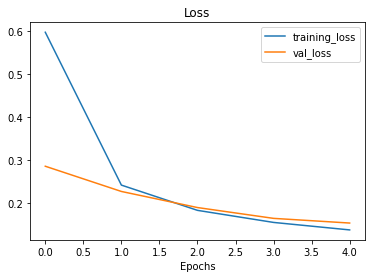

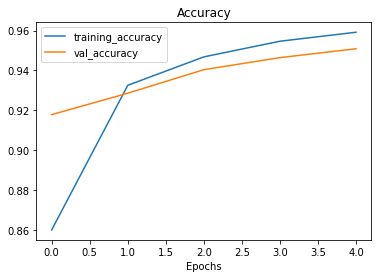

In [15]:
plot_loss_curves(history_3)

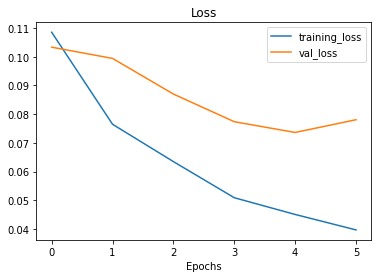

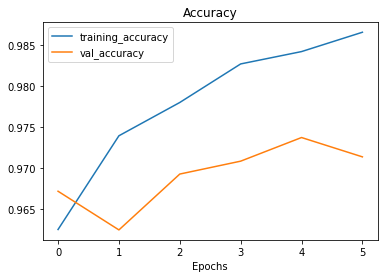

In [16]:
plot_loss_curves(history_4)

In [17]:
#Fucntion to compare loss and accuracy curves (most code is copied from plot_loss_curves function above)
def compare_historys(original_history, new_history, initial_epochs=5):
    
    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

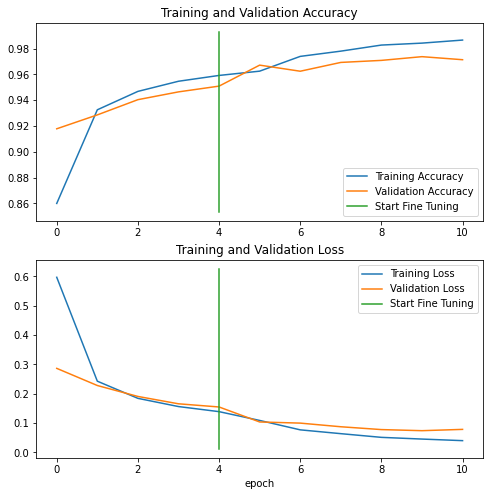

In [19]:
compare_historys(history_3, history_4, 5)